In [1]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
import seaborn as sns

In [2]:
df = pd.read_csv("./ARM_Data_extra/examples/pyth/exercise2.1.dat", sep=" ").assign(intercept=1.0)
df_train = df[~df.y.isna()]
df_test = df[df.y.isna()]
assert len(df_train) == 40
assert len(df_test) == 20

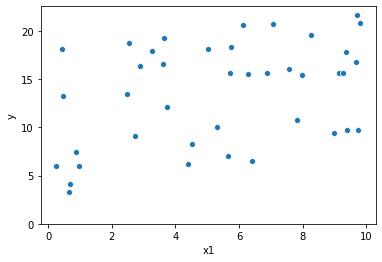

In [3]:
ax = sns.scatterplot(data = df_train, x = "x1", y = "y")
ax.set_ylim(bottom=0);

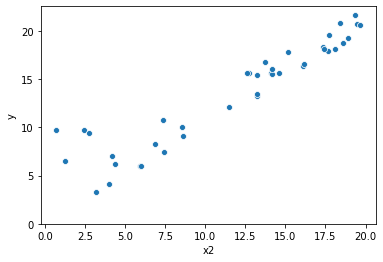

In [4]:
ax = sns.scatterplot(data = df_train, x = "x2", y = "y")
ax.set_ylim(bottom=0);

In [5]:
df_train.head()

,y,x1,x2,intercept
0,15.68,6.87,14.09,1.0
1,6.18,4.40,4.35,1.0
2,18.10,0.43,18.09,1.0
3,9.07,2.73,8.65,1.0
4,17.97,3.25,17.68,1.0


In [6]:
mdl = sm.OLS(df_train.y, df_train[['intercept', 'x1', 'x2']])
fit_results = mdl.fit()

In [7]:
fit_results.params

intercept    1.315135
x1           0.514810
x2           0.806920
dtype: float64

In [8]:
fit_results.scale

0.8100598791853296

In [9]:
fit_results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.972
Model:                            OLS   Adj. R-squared:                  0.971
Method:                 Least Squares   F-statistic:                     652.4
Date:                Wed, 29 Jan 2020   Prob (F-statistic):           1.41e-29
Time:                        15:23:15   Log-Likelihood:                -50.985
No. Observations:                  40   AIC:                             108.0
Df Residuals:                      37   BIC:                             113.0
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      1.3151      0.388      3.392      0.002       0.530       2.101
x1             0.5148      0.046     11.216      0.000       0.422       0.608
x2             0.8069      0.024     33.148      0.000       0.758       0.856
==============================================================================
Omnibus:                       14.478   Durbin-Watson:                   2.509
Prob(Omnibus):                  0.001   Jarque-Bera (JB):               15.393
Skew:                           1.341   Prob(JB):                     0.000454
Kurtosis:                       4.428   Cond. No.                         38.7
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [10]:
x1_x = np.linspace(0, df_train.x1.max() * 1.1, 10)
x2_x = np.linspace(0, df_train.x2.max() * 1.1, 10)
X_pred = pd.DataFrame(
    np.stack([x1_x, x2_x]).T, 
    columns=["x1", "x2"]
).assign(intercept=1.0).assign(y = lambda x: fit_results.predict(x[["intercept", "x1", "x2"]]))
X_pred

,x1,x2,intercept,y
0,0.000,0.000000,1.0,1.315135
1,1.199,2.405333,1.0,3.873303
2,2.398,4.810667,1.0,6.431471
3,3.597,7.216000,1.0,8.989639
4,4.796,9.621333,1.0,11.547807
5,5.995,12.026667,1.0,14.105975
6,7.194,14.432000,1.0,16.664143
7,8.393,16.837333,1.0,19.222311
8,9.592,19.242667,1.0,21.780479
9,10.791,21.648000,1.0,24.338648


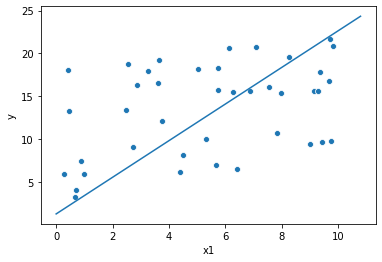

In [11]:
ax = sns.scatterplot(data = df_train, x = "x1", y = "y")
sns.lineplot(x="x1", y="y", data=X_pred, ax=ax)

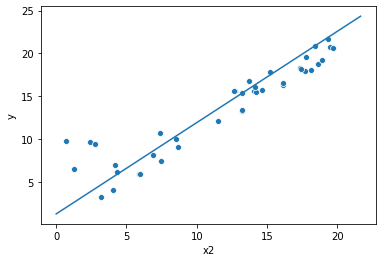

In [12]:
ax = sns.scatterplot(data = df_train, x = "x2", y = "y")
sns.lineplot(x="x2", y="y", data=X_pred, ax=ax)

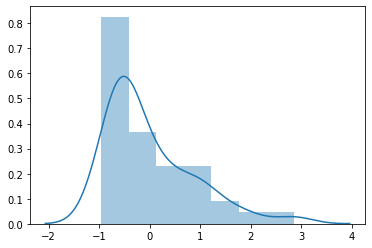

In [13]:
sns.distplot(fit_results.resid)

In [14]:
df_test_pred = df_test.assign(y = lambda x: fit_results.predict(x[["intercept", "x1", "x2"]]))

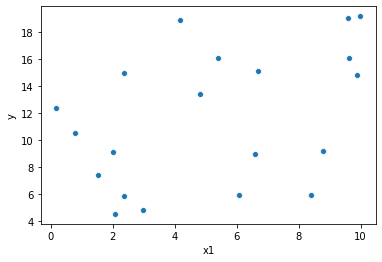

In [15]:
sns.scatterplot(data = df_test_pred, x = "x1", y = "y")

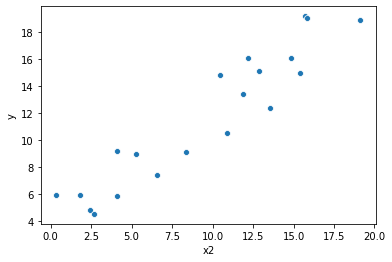

In [16]:
sns.scatterplot(data = df_test_pred, x = "x2", y = "y")